### fonctionnalités de ce module :
- Représentation graphique en couleur de grilles à maillage carré en deux dimensions,
- écoute d'évènements (sélection d'un objet, appui sur une touche du clavier),
- sortie textuelle.


# 0 : Détails techniques

### Modules requis, utilisation via notebook ou via Idle
- matplotlib
- Ipython (module installé lors de l'installation de Jupyter, requis pour une utilisation dans Jupyter notebook)

Ce module `interface_grille` a été écrit pour fonctionner dans des notebooks et sollicite donc Ipython. 
On importera uniquement la classe `Vue`:

    from interface_grille import Vue

Si vous utilisez un interpréteur python standard et que vous n'avez pas Ipython d'installé, cela fonctionne aussi. En revanche il faut au préalable mettre en commentaire l'import du module Ipython.display (dont vous n'aurez pas besoin) dans le fichier `interface_grille.py`. Il vous faudra peut-être aussi forcer l'utilisation du backend `TkAgg` en décommentant la ligne d'en-tête `mpl.use('TkAgg')` du fichier `interface_grille.py`.

### Barres de défilement (pour les notebooks uniquement)

Pour empêcher l'apparition des barres de défilement dans les sorties des notebooks on peut exécuter l'instruction suivante :

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Mettre matplotlib en mode interactif (pour les notebooks uniquement)

Pour que la vue matplotlib produite reste en écoute des instructions en provenance du programme et/ou puisse si besoin écouter les évènements, il faut que matplotlib soit en mode interactif (et pas en mode inline). Cela s'obtient en exécutant la celulle de code ci-dessous :

In [7]:
%matplotlib notebook

# I : Premiers exemples de dessin sur la grille

Dans ce qui suit on utilisera une grille de 4 x 6 cellules soit :
- 4 x 6 fonds
- 4 x 6 images
- 4 x 6 textes
- 4 x 7 murs verticaux
- 5 x 6 murs horizontaux

Le lecteur est censé se référer à la documentation ci-dessous pour consulter les attributs disponibles des différents objets graphiques (`fond`, `mur_h`, `mur_v`, `image` et `texte`).

In [8]:
from interface_grille import Vue
help(Vue.__init__)
help(Vue.modifier_grille)
help(Vue.mg)

Help on function __init__ in module interface_grille:

__init__(self, nb_lignes, nb_colonnes, max_dim=7)
    - nb_lignes   : nombre de lignes de la grille
    - nb_colonnes : nombre de colonnes de la grille
    - max_dim     : dimension maximale de la figure en inches (à 100 dpi)
    |
    |
    |
    -----------------------------------------------------------------------------------------------------------

Help on function modifier_grille in module interface_grille:

modifier_grille(self, objet, lig, col, **modifications)
    Permet de modifier les attributs d'un objet graphique présent dans la grille.
    lig et col désignent les indices de ligne et de colonne de l'objet (0, 0 : coin supérieur gauche).
        - objet : 'mur_v', 'mur_h', 'fond', 'texte', 'image'
        - lig : entier entre 0 et NB_LIGNES - 1 (sauf pour objet = 'mur_h' : entre 0 et NB_LIGNES)
        - col : entier entre 0 et NB_COLONNES - 1 (sauf pour objet = 'mur_v' : entre 0 et NB_COLONNES)
        - **modificati

<IPython.core.display.Javascript object>


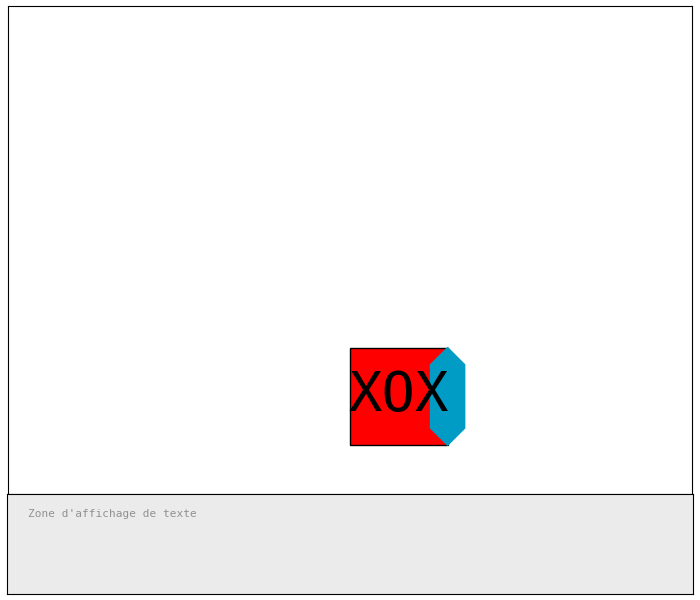

In [9]:
NB_LIG = 4
NB_COL = 6
vue_exemple = Vue(NB_LIG, NB_COL)

#### Un peu de `fond` :

In [10]:
vue_exemple.modifier_grille('fond', 0, 0, couleur_ext = (0, 0, 0), couleur_int = (0, 255, 255), visible = True)
vue_exemple.modifier_grille('fond', 3, 5, couleur_ext = (0, 0, 0), couleur_int = (255, 255, 0), visible = True)

In [11]:
for lig in range(NB_LIG):
    for col in range(NB_COL):
        vue_exemple.modifier_grille('fond', lig, col, couleur = (100, 0, 100), visible = True)

In [12]:
#on modifie dynamiquement les propriétés des objets affichés
for lig in range(NB_LIG):
    vue_exemple.modifier_grille('fond', lig, 3, alpha = 0.5)

#### Un peu de `mur_h` et `mur_v` :

In [13]:
for lig in range(NB_LIG + 1):
    for col in range(NB_COL):
        vue_exemple.modifier_grille('mur_h', lig, col, couleur_int = (192, 192, 0), visible = True)
        
for lig in range(NB_LIG):
    for col in range(NB_COL + 1):
        vue_exemple.modifier_grille('mur_v', lig, col, couleur_int = (192, 192, 0), visible = True)

In [14]:
vue_exemple.modifier_grille('mur_v', 3, 6, couleur_int = (0, 255, 0), epaisseur = 0.1)

In [15]:
vue_exemple.modifier_grille('mur_h', 4, 5, epaisseur = 0.3, alpha = 0.5)

#### Un peu d' `image` (avec quelques raccourcis disponibles) :

- Les images à afficher sont préchargées par le module avant affichage et doivent être situées dans le répertoire `./images/` ou dans ses sous-répertoires. 
- Privilégier des icônes (des images carrés de quelques dizaines de pixels de côté). 
- Seul le format `.png` est pris en charge.
- Lors de la création de l'instance de `Vue`, l'image de chaque cellule est l'image `./images/init.png` qui est transparente. Cette image ne doit donc pas être supprimée du dossier `./images/`.
- Le chemin est donné à partir de la racine de `./images/`.

In [16]:
for col in range(NB_COL):
    vue_exemple.mg('image', 2, col, cf = 'persos/frog.png', a = col/(NB_COL - 1), v = True)

In [17]:
vue_exemple.mg('image', 2, 3, a = 1, t = 0.5)

In [18]:
#où l'on constate que sans redimensionnement, le flou disparait
vue_exemple.mg('image', 2, 3, t = 1)

#### Un peu de `texte` (avec quelques raccourcis disponibles):
La gestion du texte dans matplotlib étant très pauvre, il en est de même ici. Le texte sera limité à quelques caractères.

In [19]:
vue_exemple.reinitialiser_grille()

In [20]:
from random import choice
import string

alphabet = string.ascii_uppercase

for lig in range(NB_LIG):
    for col in range(NB_COL):
        vue_exemple.mg('texte', lig, col, t = choice(alphabet), tp = 30, v = True)
        

#### z-order

Le z-order (superposition) des objets n'est pas accessible depuis l'interface et n'est donc pas modifiable.
On a, en partant du bas : `fond : z = 0`, puis `image : z = 1` puis `mur_h : z = 2` puis `mur_v : z = 3` puis `texte : z = 4`.

In [23]:
vue_exemple.mg('fond', 3, 3, ci = (255, 0, 0), ce = (0, 0, 0), v = True)
vue_exemple.mg('image', 3, 3, cf = 'symboles/Heart.png', v = True)
vue_exemple.mg('mur_v', 3, 4, c = (0, 156, 198), e = 0.35, v = True)
vue_exemple.mg('texte', 3, 3, t = 'XOX', tp = 40, v = True)

In [22]:
vue_exemple.reinitialiser_grille()

# II : Afficher du texte dans la zone texte (ça peut être utile)

In [1]:
%matplotlib notebook
from interface_grille import Vue
help(Vue.modifier_zonetexte)
help(Vue.mzt)

Help on function modifier_zonetexte in module interface_grille:

modifier_zonetexte(self, **modifications)
    Permet de modifier les attributs de la zone de texte.
        - **modifications :
            - texte ou t          : chaîne de caractères (au delà de 3 caractères, risque de débord)
            - couleur_texte ou ct : 3 ou 4-uplet d'entiers entre 0 et 255 au format (R, G, B) ou (R, G, B, A)
            - couleur_fond ou cf  : 3 ou 4-uplet d'entiers entre 0 et 255 au format (R, G, B) ou (R, G, B, A)
            - taille_police ou tp : entier, à ajuster (gestion du texte sous matplotlib est peu développée)
            - alpha ou a          : transparence, flottant entre 0 (trnsparent) et 1 (opaque)
            
    Les préférences initiales sont les attributs suivants de l'instance de Vue :
        - self.prefs_zonetexte = {'taille_police' : 8,
                                  'texte' : 'Zone d'affichage de texte', 
                                  'couleur_fond' : (235, 235,

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

<IPython.core.display.Javascript object>


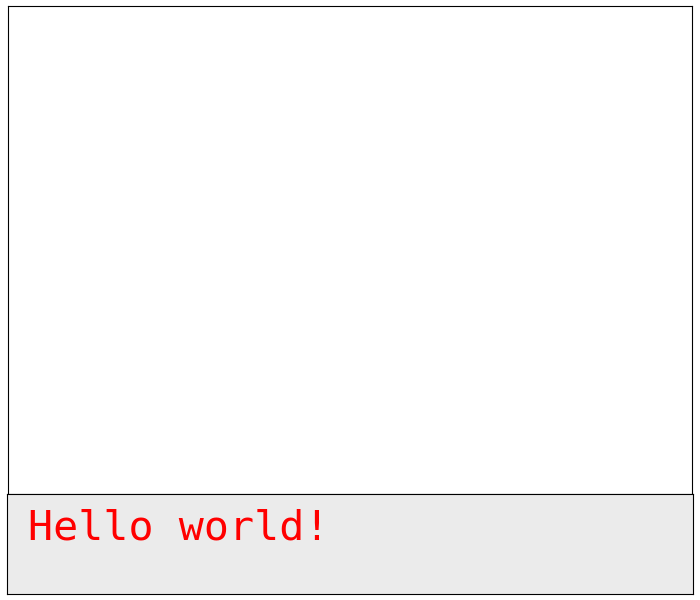

In [22]:
NB_LIG = 4
NB_COL = 6
vue_exemple = Vue(NB_LIG, NB_COL)

a = 'persos/frog.png'
b = 'persos/pinkie.png'
c = 'persos/mask.png'
d = 'persos/virtual.png'

matrice = [[a, b, c, d, a, b],
           [b, c, d, a, b, c],
           [c, d, a, b, c, d],
           [d, a, b, c, d, a]]

def afficher_matrice(mat):
    for lig in range(NB_LIG):
        for col in range(NB_COL):
            vue_exemple.mg('image', lig, col, cf = mat[lig][col], v = True)
        
afficher_matrice(matrice)
vue_exemple.modifier_zonetexte(texte = 'Hello world!', ct = (255, 0, 0), tp = 30 )

In [19]:
vue_exemple.reinitialiser_zonetexte()

# III : Export en png

In [20]:
help(Vue.exporter_png)

Help on function exporter_png in module interface_grille:

exporter_png(self, chemin_fichier)
    Permet d'exporter la vue au format png :
        - chemin_fichier : chemin d'accès au fichier qui sera enregistré
    |
    |
    |
    -----------------------------------------------------------------------------------------------------------



In [21]:
vue_exemple.exporter_png('exemple.png')

# IV : Interactivité

In [22]:
%matplotlib notebook
from interface_grille import Vue
help(Vue.lier_evenement)

Help on function lier_evenement in module interface_grille:

lier_evenement(self, evenement, gestionnaire, activer, argument=None)
    Permet d'activer la gestion de certains évènements. 
    - evenement     : 'appui_touche', 'fin_appui_touche', 'selection_objet', 'clic_souris' , 'fin_clic_souris
    - gestionnaire  : fonction qui réceptionnera les évènements déclenchés
                      cette fonction doit avoir un paramètre obligatoire et un paramètre facultatif :
                       - e à qui sera affecté l'évènement qui a été déclenché (requis)
                       - a à qui sera affecté argument s'il a été fourni (facultatif)
    - activer       : booléen indiquant si on active l'écoute ou désactive une écoute mise en place
    
    Voici les contenus des cinq évènements disponibles qui sont des dictionnaires dont les clefs sont :
      - 'appui_touche'       : 'evenement',          'touche', 'lig', 'col', 'moment',         
      - 'fin_appui_touche'   : 'evenement',    

Les points fondamentaux à comprendre concernant la liaison d'évènements (ce n'est pas spécifique à cette interface) sont :
- il faut créer une fonction dite "gestionnaire" ou "écouteur" qui va s'occuper, lorsqu'un évènement a lieu, d'exécuter telle ou telle séquence d'instructions. Il faut donc indiquer à l'interface graphique que, lorsque tel ou tel évènement survient il faut appeler telle ou telle fonction gestionnaire. On dit qu'on **lie un évènement à une fonction gestionnaire**


- la fonction qui va gérer l'évènement va obligatoirement recevoir un argument `evenement` qui va indiquer de quel évènement il s'agit (quel bouton a été cliqué, quelle touche a été appuyée, quel élément graphique a été sélectionné etc.). C'est l'interface graphique qui passe automatiquement l'évènement à la fonction sans que le programmeur n'ait à l'indiquer quelque part (c'est donc "invisible", ce qui peut surprendre les premières fois).   


- si le programmeur souhaite agir sur la mémoire du programme (typiquement les matrices représentant le plateau et/ou d'autres informations) lorsque l'évènement survient, il faut que la fonction gestionnaire récupère cette "mémoire du programme" pour pouvoir agir dessus **ce qui suppose deux choses** :
    - que cette "mémoire du programme" soit passée en argument à la fonction gestionnaire (d'où la possibilité de passer un argument à la fonction gestionnaire lors de la liaison)
    - que les modifications **opérées à l'intérieur** de la fonction gestionnaire sur cette "mémoire du programme" soient **répercutées à l'extérieur** de la fonction. Ce qui suppose que cette "mémoire du programme" soit stockée dans une  structure de données mutable (par exemple `list` ou `dict` python, ou objet au sens POO)
    

**Cet objet `evenement` est très pratique car l'interface graphique nous y a stocké un travail précieux. En effet, elle nous indique dans le dictionnaire `evenement` quel objet a été sélectionné à la souris, à quelle ligne et à quelle colonne ! Il n'y a donc rien à faire pour obtenir ces informations, si ce n'est les lire dans le dictionnaire `evenement` !**

<IPython.core.display.Javascript object>


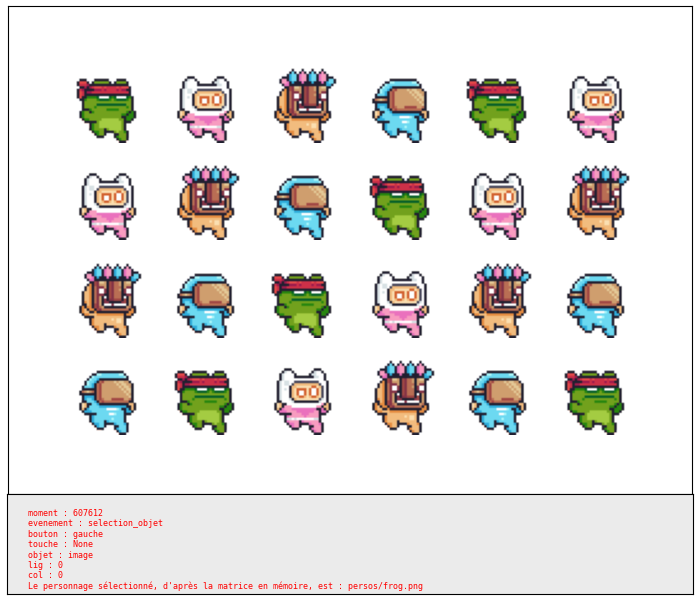

In [23]:
NB_LIG = 4
NB_COL = 6
vue_exemple = Vue(NB_LIG, NB_COL)

a = 'persos/frog.png'
b = 'persos/pinkie.png'
c = 'persos/mask.png'
d = 'persos/virtual.png'

matrice = [[a, b, c, d, a, b],
           [b, c, d, a, b, c],
           [c, d, a, b, c, d],
           [d, a, b, c, d, a]]

def afficher_matrice(mat):
    for lig in range(NB_LIG):
        for col in range(NB_COL):
            vue_exemple.mg('image', lig, col, cf = mat[lig][col], v = True)
        
        
def gestionnaire_selection(evenement, matrice):
    S = ''
    for key, val in evenement.items():
        S = S + key + ' : ' + str(val) + '\n'
    lig = evenement['lig']
    col = evenement['col']       
    S = S + 'Le personnage sélectionné, d\'après la matrice en mémoire, est : ' +  matrice[lig][col]
    vue_exemple.mzt(t = S, ct = (255, 0, 0), tp = 6)
    
vue_exemple.lier_evenement('selection_objet', gestionnaire_selection, True, argument = matrice )
afficher_matrice(matrice)